In [ ]:
# uploads keep failing so mount drive instead
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip image files from google colab storage
import zipfile
import os

# zip paths
zip_paths = {
    "train": "/content/drive/MyDrive/ISIC-2018/train_images.zip",
    "validation": "/content/drive/MyDrive/ISIC-2018/validation_images.zip",
    "test": "/content/drive/MyDrive/ISIC-2018/test_images.zip"
}

# extract to
extract_paths = {
    "train": "/content/train_images",
    "validation": "/content/validation_images",
    "test": "/content/test_images"
}

# unzip extracted files
for key in zip_paths:
    with zipfile.ZipFile(zip_paths[key], 'r') as zip_ref:
        zip_ref.extractall(extract_paths[key])

# display images to verify extraction worked
print(os.listdir(extract_paths['train'])[:5])
print(os.listdir(extract_paths['validation'])[:5])
print(os.listdir(extract_paths['test'])[:5])

['ISIC_0029034.jpg', 'ISIC_0028293.jpg', 'ISIC_0033179.jpg', 'ISIC_0026000.jpg', 'ISIC_0025457.jpg']
['ISIC_0034399.jpg', 'ISIC_0034438.jpg', 'ISIC_0034407.jpg', 'ISIC_0034369.jpg', 'ISIC_0034401.jpg']
['ISIC_0036045.jpg', 'ISIC_0035905.jpg', 'ISIC_0035190.jpg', 'ISIC_0035837.jpg', 'ISIC_0034564.jpg']


In [ ]:
from google.colab import files
# uploading metadata for classification labels
uploaded_metadata = files.upload()

Saving validation_metadata.csv to validation_metadata.csv


In [ ]:
# reading the metadata files
import pandas as pd

test_metadata = pd.read_csv('test_metadata.csv')
train_metadata = pd.read_csv('train_metadata.csv')
validation_metadata = pd.read_csv('validation_metadata.csv')

# ensure files are read correctly
print(test_metadata.head())
print(train_metadata.head())
print(validation_metadata.head())

        isic_id                                        attribution  \
0  ISIC_0034524  ViDIR Group, Department of Dermatology, Medica...   
1  ISIC_0034525  ViDIR Group, Department of Dermatology, Medica...   
2  ISIC_0034526  ViDIR Group, Department of Dermatology, Medica...   
3  ISIC_0034527  ViDIR Group, Department of Dermatology, Medica...   
4  ISIC_0034528  ViDIR Group, Department of Dermatology, Medica...   

  copyright_license  age_approx anatom_site_general benign_malignant  \
0          CC-BY-NC        40.0     posterior torso           benign   
1          CC-BY-NC        70.0      anterior torso           benign   
2          CC-BY-NC        70.0     posterior torso              NaN   
3          CC-BY-NC        35.0                 NaN           benign   
4          CC-BY-NC        75.0                 NaN           benign   

   concomitant_biopsy                   diagnosis  \
0               False                       nevus   
1                True                   

In [ ]:
# check for null values in the 'benign_malignant' column
null_values = train_metadata['benign_malignant'].isnull()

# display all rows with null values
print("Rows with null values in 'benign_malignant':")
print(train_metadata[null_values])

# count the number of null values in the 'benign_malignant' column
num_null_values = train_metadata['benign_malignant'].isnull().sum()
print(f"Number of null values in 'benign_malignant' column: {num_null_values}")

Rows with null values in 'benign_malignant':
            isic_id                                        attribution  \
6      ISIC_0024312  ViDIR Group, Department of Dermatology, Medica...   
12     ISIC_0024318  ViDIR Group, Department of Dermatology, Medica...   
18     ISIC_0024324  ViDIR Group, Department of Dermatology, Medica...   
23     ISIC_0024329  ViDIR Group, Department of Dermatology, Medica...   
24     ISIC_0024330  ViDIR Group, Department of Dermatology, Medica...   
...             ...                                                ...   
9993   ISIC_0034299  ViDIR Group, Department of Dermatology, Medica...   
9997   ISIC_0034303  ViDIR Group, Department of Dermatology, Medica...   
10000  ISIC_0034306  ViDIR Group, Department of Dermatology, Medica...   
10009  ISIC_0034315  ViDIR Group, Department of Dermatology, Medica...   
10012  ISIC_0034318  ViDIR Group, Department of Dermatology, Medica...   

      copyright_license  age_approx anatom_site_general benign_mal

In [ ]:
# check for duplicate values in the 'isic_id' column
duplicates = train_metadata[train_metadata.duplicated('isic_id', keep=False)]

# display rows with duplicate image IDs
print("Rows with duplicate image IDs:")
print(duplicates)

# count the number of duplicate image IDs
num_duplicates = train_metadata.duplicated('isic_id', keep=False).sum()
print(f"Number of duplicate image IDs: {num_duplicates}")

# identify unique IDs by removing duplicates
unique_ids = train_metadata.drop_duplicates('isic_id')
print("Unique IDs DataFrame:")
print(unique_ids)

Rows with duplicate image IDs:
Empty DataFrame
Columns: [isic_id, attribution, copyright_license, age_approx, anatom_site_general, benign_malignant, concomitant_biopsy, diagnosis, diagnosis_confirm_type, image_type, lesion_id, melanocytic, sex]
Index: []
Number of duplicate image IDs: 0
Unique IDs DataFrame:
            isic_id                                        attribution  \
0      ISIC_0024306  ViDIR Group, Department of Dermatology, Medica...   
1      ISIC_0024307  ViDIR Group, Department of Dermatology, Medica...   
2      ISIC_0024308  ViDIR Group, Department of Dermatology, Medica...   
3      ISIC_0024309  ViDIR Group, Department of Dermatology, Medica...   
4      ISIC_0024310  ViDIR Group, Department of Dermatology, Medica...   
...             ...                                                ...   
10010  ISIC_0034316  ViDIR Group, Department of Dermatology, Medica...   
10011  ISIC_0034317  ViDIR Group, Department of Dermatology, Medica...   
10012  ISIC_0034318  ViD

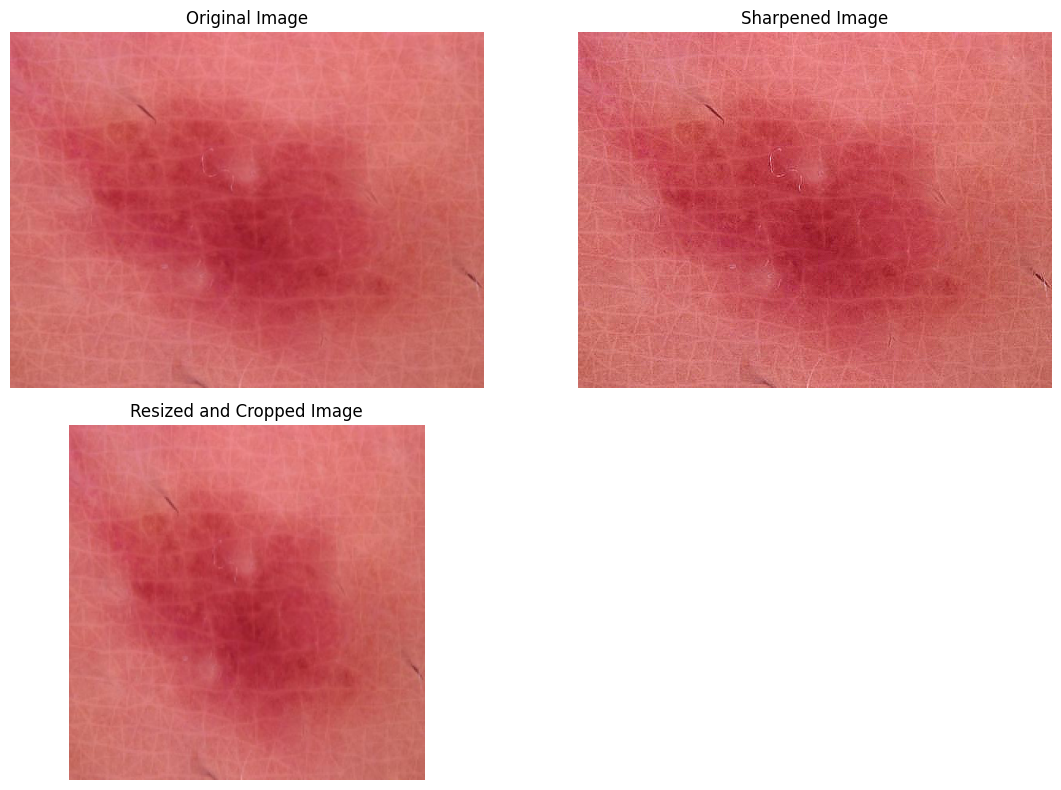

In [ ]:
# displaying images with the developed preprocessing methods
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Define preprocessing functions
def sharpen_image(image):
    sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpening_kernel)

def resize_and_crop(image, target_size=(224, 224)):
    resized = cv2.resize(image, target_size)
    height, width, _ = resized.shape
    size = min(height, width)
    x_center = width // 2
    y_center = height // 2
    cropped = resized[y_center - size // 2:y_center + size // 2, x_center - size // 2:x_center + size // 2]
    return cropped

# Path to your images folder
image_folder_path = "/content/train_images"

# List all files in the directory
image_files = [f for f in os.listdir(image_folder_path) if f.endswith('.jpg')]

# Select a random image file
random_image_file = random.choice(image_files)
image_path = os.path.join(image_folder_path, random_image_file)

# Load the selected image
original_image = cv2.imread(image_path)

# Convert from BGR to RGB (OpenCV loads images in BGR format)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Apply preprocessing
sharpened_image = sharpen_image(original_image_rgb)
resized_cropped_image = resize_and_crop(original_image_rgb)

# Display images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(original_image_rgb)
plt.axis('off')

# Sharpened Image
plt.subplot(2, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image)
plt.axis('off')

# Resized and Cropped Image
plt.subplot(2, 2, 3)
plt.title('Resized and Cropped Image')
plt.imshow(resized_cropped_image)
plt.axis('off')

# Display all images
plt.tight_layout()
plt.show()


In [ ]:
# final model
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing the images
def sharpen_image(image):
    sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpening_kernel)

def resize_and_crop(image):
    resized = cv2.resize(image, (224, 224))
    height, width, _ = resized.shape
    size = min(height, width)
    x_center = width // 2
    y_center = height // 2
    cropped = resized[y_center - size // 2:y_center + size // 2, x_center - size // 2:x_center + size // 2]
    return cropped

def normalize_image(image):
    return image / 255.0

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = sharpen_image(image)
    image = resize_and_crop(image)
    image = normalize_image(image)
    return image

# custom data generator
class CustomImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, image_dir, batch_size=32, shuffle=True, augment=False):
        # ensures metadata is clean
        self.metadata = self.clean_metadata(metadata)
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.indices = np.arange(len(self.metadata))
        self.on_epoch_end()

        self.augmentation = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
    # function to remove duplicates from the metadat
    def clean_metadata(self, metadata):
        # remove duplicates
        metadata = metadata.drop_duplicates()

        # remove rows with missing image paths or labels
        metadata = metadata.dropna(subset=['isic_id', 'benign_malignant'])

        # ensure valid labels
        valid_labels = {'benign', 'malignant'}
        metadata = metadata[metadata['benign_malignant'].isin(valid_labels)]

        return metadata

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_metadata = self.metadata.iloc[indices]

        images = []
        labels = []
        for _, row in batch_metadata.iterrows():
            img_path = os.path.join(self.image_dir, row['isic_id'] + '.jpg')
            image = cv2.imread(img_path)

            # check for poor-quality or missing images
            if image is None or image.size == 0:
                print(f"Warning: Skipping image at path: {img_path} (image is None or empty)")
                continue

            image = preprocess_image(image)
            if self.augment:
                image = self.augmentation.random_transform(image)
            images.append(image)

            # map labels correctly
            label = label_map.get(row['benign_malignant'])
            if label is None:
                raise ValueError(f"Invalid label found: {row['benign_malignant']}")
            labels.append(label)

        # handle case where no valid images are found in a batch
        if len(images) == 0:
            return np.zeros((self.batch_size, 224, 224, 3)), np.zeros(self.batch_size)

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# loading in the metadata
train_metadata = pd.read_csv('train_metadata.csv')
validation_metadata = pd.read_csv('validation_metadata.csv')
test_metadata = pd.read_csv('test_metadata.csv')

# label map
label_map = {'benign': 0, 'malignant': 1}

# create the custom image generators
train_generator = CustomImageDataGenerator(
    metadata=train_metadata,
    image_dir='/content/train_images',
    batch_size=32,
    shuffle=True,
    augment=True
)

val_generator = CustomImageDataGenerator(
    metadata=validation_metadata,
    image_dir='/content/validation_images',
    batch_size=32,
    shuffle=False
)

test_generator = CustomImageDataGenerator(
    metadata=test_metadata,
    image_dir='/content/test_images',
    batch_size=32,
    shuffle=False
)



In [ ]:
def create_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)                                                # dropout layer to prevent overfitting
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # compile the model with a smaller learning rate and gradient clipping
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = create_model()

29084464/29084464 [==============================] - 0s 0us/step


Epoch 1/10
244/244 [==============================] - ETA: 0s - loss: 0.3252 - accuracy: 0.8657

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


244/244 [==============================] - 1554s 6s/step - loss: 0.3252 - accuracy: 0.8657 - val_loss: 0.2611 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 2/10
244/244 [==============================] - 1566s 6s/step - loss: 0.2817 - accuracy: 0.8829 - val_loss: 0.2440 - val_accuracy: 0.8984 - lr: 1.0000e-04
Epoch 3/10
244/244 [==============================] - 1510s 6s/step - loss: 0.2701 - accuracy: 0.8858 - val_loss: 0.2458 - val_accuracy: 0.8984 - lr: 1.0000e-04
Epoch 4/10
244/244 [==============================] - 1489s 6s/step - loss: 0.2600 - accuracy: 0.8906 - val_loss: 0.2246 - val_accuracy: 0.9297 - lr: 1.0000e-04
Epoch 5/10
244/244 [==============================] - 1459s 6s/step - loss: 0.2639 - accuracy: 0.8860 - val_loss: 0.2238 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 6/10
244/244 [==============================] - 1446s 6s/step - loss: 0.2518 - accuracy: 0.8909 - val_loss: 0.2264 - val_accuracy: 0.9219 - lr: 1.0000e-04
Epoch 7/10
244/244 [=========================

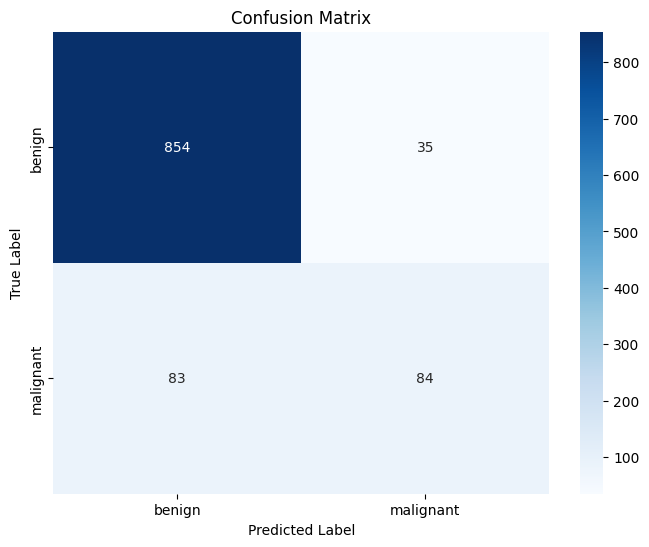

Classification Report:
              precision    recall  f1-score   support

      benign       0.91      0.96      0.94       889
   malignant       0.71      0.50      0.59       167

    accuracy                           0.89      1056
   macro avg       0.81      0.73      0.76      1056
weighted avg       0.88      0.89      0.88      1056



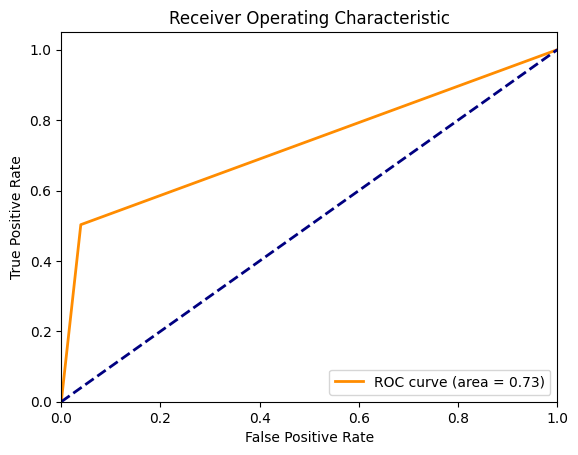

In [ ]:
# callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

# manual definition of class weights
#class_weight_dict = {0: 1.0, 1: 2.0}  # Example weights, adjust as needed, tried 4, got overfitted data with 0.6 loss
#print("Class weights:", class_weight_dict)

# training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
   # class_weight=class_weight_dict,  # Include class weights here
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate Predictions
def generate_predictions(generator, model):
    predictions = []
    true_labels = []
    for batch_images, batch_labels in generator:
        batch_preds = model.predict(batch_images)
        predictions.extend(np.round(batch_preds).astype(int).flatten())
        true_labels.extend(batch_labels)
        if len(true_labels) >= len(generator) * generator.batch_size:
            break
    return np.array(true_labels), np.array(predictions)

true_labels, predictions = generate_predictions(test_generator, model)

from sklearn.metrics import matthews_corrcoef

def calculate_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    return specificity

def calculate_mcc(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    mcc = matthews_corrcoef([tn, fp, fn, tp], [tp, fn, tn, fp])
    return mcc

# Compute Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

specificity = calculate_specificity(conf_matrix)
mcc = calculate_mcc(conf_matrix)

print(f'Specificity: {specificity}')
print(f'MCC: {mcc}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predictions, target_names=list(label_map.keys()))
print('Classification Report:')
print(report)

# Plot ROC Curve and Calculate AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# model with class weights for imbalance
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing the images
def sharpen_image(image):
    sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpening_kernel)

def resize_and_crop(image):
    resized = cv2.resize(image, (224, 224))
    height, width, _ = resized.shape
    size = min(height, width)
    x_center = width // 2
    y_center = height // 2
    cropped = resized[y_center - size // 2:y_center + size // 2, x_center - size // 2:x_center + size // 2]
    return cropped

def normalize_image(image):
    return image / 255.0

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = sharpen_image(image)
    image = resize_and_crop(image)
    image = normalize_image(image)
    return image

# Custom Data Generator
class CustomImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, image_dir, batch_size=32, shuffle=True, augment=False):
        # Ensure metadata is clean
        self.metadata = self.clean_metadata(metadata)
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.indices = np.arange(len(self.metadata))
        self.on_epoch_end()

        self.augmentation = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
    # function to remove duplicates from the metadat
    def clean_metadata(self, metadata):
        # remove duplicates
        metadata = metadata.drop_duplicates()

        # remove rows with missing image paths or labels
        metadata = metadata.dropna(subset=['isic_id', 'benign_malignant'])

        # ensure valid labels
        valid_labels = {'benign', 'malignant'}
        metadata = metadata[metadata['benign_malignant'].isin(valid_labels)]

        return metadata

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_metadata = self.metadata.iloc[indices]

        images = []
        labels = []
        for _, row in batch_metadata.iterrows():
            img_path = os.path.join(self.image_dir, row['isic_id'] + '.jpg')
            image = cv2.imread(img_path)

            # Check for poor-quality or missing images
            if image is None or image.size == 0:
                print(f"Warning: Skipping image at path: {img_path} (image is None or empty)")
                continue

            image = preprocess_image(image)
            if self.augment:
                image = self.augmentation.random_transform(image)
            images.append(image)

            # Map labels correctly
            label = label_map.get(row['benign_malignant'])
            if label is None:
                raise ValueError(f"Invalid label found: {row['benign_malignant']}")
            labels.append(label)

        # Handle the case where no valid images are found in a batch
        if len(images) == 0:
            return np.zeros((self.batch_size, 224, 224, 3)), np.zeros(self.batch_size)

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# loading in the metadat
train_metadata = pd.read_csv('train_metadata.csv')
validation_metadata = pd.read_csv('validation_metadata.csv')
test_metadata = pd.read_csv('test_metadata.csv')

# label map
label_map = {'benign': 0, 'malignant': 1}

# create the custom image generators
train_generator = CustomImageDataGenerator(
    metadata=train_metadata,
    image_dir='/content/train_images',
    batch_size=32,
    shuffle=True,
    augment=True
)

val_generator = CustomImageDataGenerator(
    metadata=validation_metadata,
    image_dir='/content/validation_images',
    batch_size=32,
    shuffle=False
)

test_generator = CustomImageDataGenerator(
    metadata=test_metadata,
    image_dir='/content/test_images',
    batch_size=32,
    shuffle=False
)


In [ ]:
def create_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a smaller learning rate and gradient clipping
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = create_model()

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# check for unique values and their data types in separate test
print(train_metadata['benign_malignant'].unique())
print(train_metadata['benign_malignant'].dtype)

# convert to type string
train_metadata['benign_malignant'] = train_metadata['benign_malignant'].astype(str)

# missing value check
missing_values = train_metadata['benign_malignant'].isnull().sum()
print(f"Missing values in 'benign_malignant' column: {missing_values}")

# drop missing values if found
train_metadata = train_metadata.dropna(subset=['benign_malignant'])


['benign' 'malignant' nan]
object
Missing values in 'benign_malignant' column: 0


Epoch 1/10
244/244 [==============================] - ETA: 0s - loss: 0.4437 - accuracy: 0.7640

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


244/244 [==============================] - 1776s 7s/step - loss: 0.4437 - accuracy: 0.7640 - val_loss: 0.3069 - val_accuracy: 0.8594 - lr: 1.0000e-04
Epoch 2/10
244/244 [==============================] - 1719s 7s/step - loss: 0.3894 - accuracy: 0.7947 - val_loss: 0.2825 - val_accuracy: 0.8594 - lr: 1.0000e-04
Epoch 3/10
244/244 [==============================] - 1729s 7s/step - loss: 0.3660 - accuracy: 0.8085 - val_loss: 0.4137 - val_accuracy: 0.7891 - lr: 1.0000e-04
Epoch 4/10
244/244 [==============================] - 1728s 7s/step - loss: 0.3570 - accuracy: 0.8126 - val_loss: 0.2542 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 5/10
244/244 [==============================] - 1724s 7s/step - loss: 0.3482 - accuracy: 0.8266 - val_loss: 0.4230 - val_accuracy: 0.7891 - lr: 1.0000e-04
Epoch 6/10
244/244 [==============================] - 1745s 7s/step - loss: 0.3466 - accuracy: 0.8221 - val_loss: 0.3710 - val_accuracy: 0.7891 - lr: 1.0000e-04
Epoch 7/10
33/33 [===========================

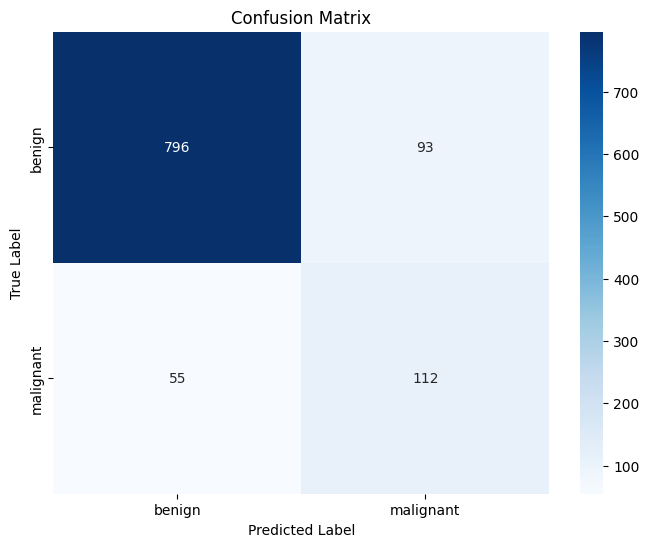

Classification Report:
              precision    recall  f1-score   support

      benign       0.94      0.90      0.91       889
   malignant       0.55      0.67      0.60       167

    accuracy                           0.86      1056
   macro avg       0.74      0.78      0.76      1056
weighted avg       0.87      0.86      0.87      1056



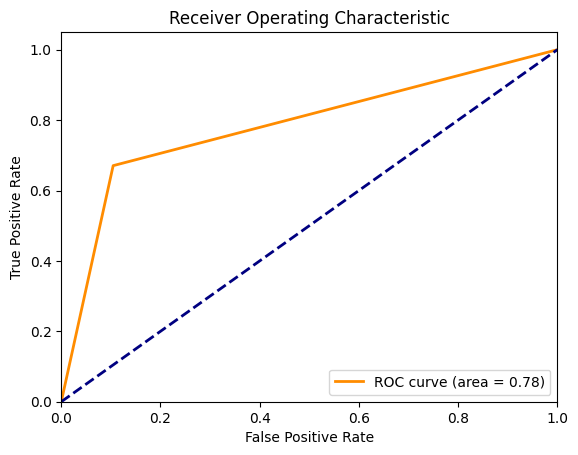

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on the training metadata
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_metadata['benign_malignant']),
    y=train_metadata['benign_malignant']
)
class_weight_dict = dict(enumerate(class_weights))

# Train the Model with class weights
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weight_dict,  # This line integrates class weights into training
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate Predictions
def generate_predictions(generator, model):
    predictions = []
    true_labels = []
    for batch_images, batch_labels in generator:
        batch_preds = model.predict(batch_images)
        predictions.extend(np.round(batch_preds).astype(int).flatten())
        true_labels.extend(batch_labels)
        if len(true_labels) >= len(generator) * generator.batch_size:
            break
    return np.array(true_labels), np.array(predictions)

true_labels, predictions = generate_predictions(test_generator, model)

# Compute Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predictions, target_names=list(label_map.keys()))
print('Classification Report:')
print(report)

# Plot ROC Curve and Calculate AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define preprocessing functions
def sharpen_image(image):
    sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpening_kernel)

def resize_and_crop(image):
    resized = cv2.resize(image, (224, 224))
    height, width, _ = resized.shape
    size = min(height, width)
    x_center = width // 2
    y_center = height // 2
    cropped = resized[y_center - size // 2:y_center + size // 2, x_center - size // 2:x_center + size // 2]
    return cropped

def normalize_image(image):
    return image / 255.0

def preprocess_image(image):
    image = sharpen_image(image)
    image = resize_and_crop(image)
    image = normalize_image(image)
    return image

# Custom Data Generator
class CustomImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, image_dir, batch_size=32, shuffle=True, augment=False):
        self.metadata = metadata
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augment = augment
        self.indices = np.arange(len(self.metadata))
        self.on_epoch_end()

        self.augmentation = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_metadata = self.metadata.iloc[indices]

        images = []
        labels = []
        for _, row in batch_metadata.iterrows():
            img_path = os.path.join(self.image_dir, row['isic_id'] + '.jpg')
            image = cv2.imread(img_path)
            if image is None:
                raise ValueError(f"Failed to load image at path: {img_path}")
            image = preprocess_image(image)
            if self.augment:
                image = self.augmentation.random_transform(image)
            images.append(image)

            # Map labels correctly
            label = label_map.get(row['benign_malignant'])
            if label is None:
                raise ValueError(f"Invalid label found: {row['benign_malignant']}")
            labels.append(label)

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# Load Metadata
train_metadata = pd.read_csv('train_metadata.csv')
validation_metadata = pd.read_csv('validation_metadata.csv')
test_metadata = pd.read_csv('test_metadata.csv')

# Define Valid Labels
valid_labels = {'benign', 'malignant'}

# Filter Metadata
train_metadata = train_metadata[train_metadata['benign_malignant'].isin(valid_labels)]
validation_metadata = validation_metadata[validation_metadata['benign_malignant'].isin(valid_labels)]
test_metadata = test_metadata[test_metadata['benign_malignant'].isin(valid_labels)]

# Define Label Map
label_map = {'benign': 0, 'malignant': 1}

# Create Data Generators
train_generator = CustomImageDataGenerator(
    metadata=train_metadata,
    image_dir='/content/train_images',
    batch_size=32,
    shuffle=True,
    augment=True
)

val_generator = CustomImageDataGenerator(
    metadata=validation_metadata,
    image_dir='/content/validation_images',
    batch_size=32,
    shuffle=False
)

test_generator = CustomImageDataGenerator(
    metadata=test_metadata,
    image_dir='/content/test_images',
    batch_size=32,
    shuffle=False
)


In [ ]:

def create_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a smaller learning rate and gradient clipping
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = create_model()


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:

# Define k-fold cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

# Iterate through each fold
for fold, (train_indices, val_indices) in enumerate(kf.split(train_metadata)):
    print(f"Training Fold {fold + 1}...")

    # Split metadata for the current fold
    train_fold_metadata = train_metadata.iloc[train_indices]
    val_fold_metadata = train_metadata.iloc[val_indices]

    # Create data generators for the current fold
    train_fold_generator = CustomImageDataGenerator(
        metadata=train_fold_metadata,
        image_dir='/content/train_images',
        batch_size=32,
        shuffle=True,
        augment=True
    )

    val_fold_generator = CustomImageDataGenerator(
        metadata=val_fold_metadata,
        image_dir='/content/train_images',
        batch_size=32,
        shuffle=False
    )

    # Create a new model for the current fold
    model = create_model()

    # Train the model
    history = model.fit(
        train_fold_generator,
        epochs=5,
        validation_data=val_fold_generator,
        callbacks=[early_stopping, checkpoint, reduce_lr]
    )


Training Fold 1...
Epoch 1/5
162/162 [==============================] - ETA: 0s - loss: 0.3593 - accuracy: 0.8609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 1742s 11s/step - loss: 0.3593 - accuracy: 0.8609 - val_loss: 0.2988 - val_accuracy: 0.8681 - lr: 1.0000e-04
Epoch 2/5
162/162 [==============================] - 1696s 10s/step - loss: 0.2964 - accuracy: 0.8667 - val_loss: 0.2786 - val_accuracy: 0.8831 - lr: 1.0000e-04
Epoch 3/5
162/162 [==============================] - 1667s 10s/step - loss: 0.2914 - accuracy: 0.8765 - val_loss: 0.2636 - val_accuracy: 0.8912 - lr: 1.0000e-04
Epoch 4/5
162/162 [==============================] - 1691s 10s/step - loss: 0.2740 - accuracy: 0.8862 - val_loss: 0.2601 - val_accuracy: 0.8920 - lr: 1.0000e-04
Epoch 5/5
162/162 [==============================] - 1648s 10s/step - loss: 0.2603 - accuracy: 0.8870 - val_loss: 0.2646 - val_accuracy: 0.8897 - lr: 1.0000e-04
Training Fold 2...
Epoch 1/5
162/162 [==============================] - 1709s 11s/step - loss: 0.3527 - accuracy: 0.8540 - val_loss: 0.3288 - val_accuracy: 0.8646 - lr: 1.0000e-04
Epoch 2/5
162/162 [======

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate Predictions
def generate_predictions(generator, model):
    predictions = []
    true_labels = []
    for batch_images, batch_labels in generator:
        batch_preds = model.predict(batch_images)
        predictions.extend(np.round(batch_preds).astype(int).flatten())
        true_labels.extend(batch_labels)
        if len(true_labels) >= len(generator) * generator.batch_size:
            break
    return np.array(true_labels), np.array(predictions)

true_labels, predictions = generate_predictions(test_generator, model)

# Compute Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predictions, target_names=list(label_map.keys()))
print('Classification Report:')
print(report)

# Plot ROC Curve and Calculate AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


NameError: name 'model' is not defined